In [1]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
"""
Ingest XLS data into dataframes to train and test on
"""
def load_data(filepath, target_column):
    df = pd.read_csv(filepath)
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    return X, y

train_filepath = "data_for_KNN_train.csv"
test_filepath = "data_for_KNN_test.csv"    
target_column = "log_price" 

X_train, y_train = load_data(train_filepath, target_column)
X_test, y_test = load_data(test_filepath, target_column)
X_train = X_train.replace('1m', np.nan).fillna(0.5).astype(float)
X_test = X_test.replace('1m', np.nan).fillna(0.5).astype(float)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

class KNNRegressor(object):
    def __init__(self, n_neighbors=5, normalize=False):
        self.n_neighbors = n_neighbors
        self.model = KNeighborsRegressor(n_neighbors=n_neighbors)
        self.normalize = normalize
        self.scaler = StandardScaler()

    def fit(self, X, y):
        if self.normalize:
            X = self.scaler.fit_transform(X)
        self.model.fit(X, y)

    def evaluate(self, X, y):
        if self.normalize:
            X = self.scaler.transform(X)
        
        pred = self.model.predict(X)
        rmse = np.sqrt(np.mean((pred - y) ** 2))
        return rmse


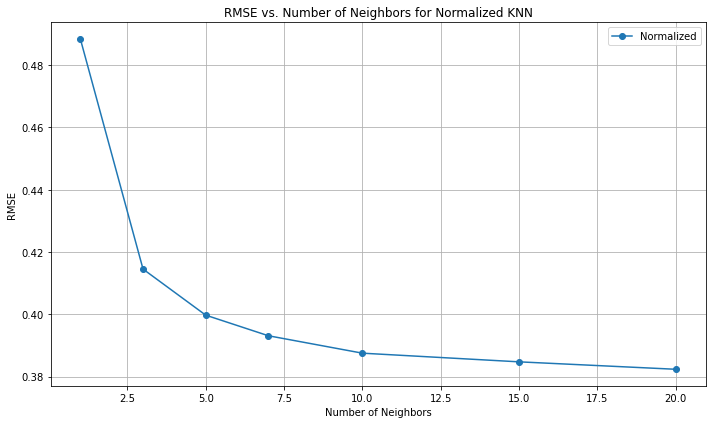

Minimum error normalized for n_neighbors 20: 0.3823545171852598


In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neighbors_range = [1, 3, 5, 7, 10, 15, 20]
RMSE_normalized = []

best_n_neighbors_norm = 0
normalized_min_rmse = np.inf

for n_neighbors in neighbors_range:
    knn_object_normalized = KNNRegressor(n_neighbors=n_neighbors, normalize=True)
    knn_object_normalized.fit(X_train_scaled, y_train) 
    rmse_normalized = knn_object_normalized.evaluate(X_test_scaled, y_test) 
    RMSE_normalized.append(rmse_normalized)

    if rmse_normalized < normalized_min_rmse:
        normalized_min_rmse = rmse_normalized
        best_n_neighbors_norm = n_neighbors

plt.figure(figsize=(10, 6))
# plt.ylim(0, max(RMSE_normalized) * 1.1)
plt.plot(neighbors_range, RMSE_normalized, label="Normalized", marker='o')
plt.title('RMSE vs. Number of Neighbors for Normalized KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Minimum error normalized for n_neighbors {best_n_neighbors_norm}: {normalized_min_rmse}")


In [ ]:
def load_data(filepath, target_column):
    df = pd.read_csv(filepath)
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    return X, y

train_filepath = "data_for_KNN_train.csv"
test_filepath = "data_for_KNN_test.csv"    
target_column = "log_price" 

X_train, y_train = load_data(train_filepath, target_column)
X_test, y_test = load_data(test_filepath, target_column)
X_train = X_train.replace('1m', np.nan).fillna(0.5).astype(float)
X_test = X_test.replace('1m', np.nan).fillna(0.5).astype(float)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 0.3997655928388764
